In [3]:
# Reading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from scipy.stats import ttest_ind
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from wordcloud import WordCloud
from sklearn.pipeline import make_pipeline
import warnings
import statsmodels.api as sm
from statsmodels.api import OLS, add_constant
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style("darkgrid")
df=pd.read_csv(r"C:\Users\hp\OneDrive - subho\Desktop\UNIFIED\python\Google Playstore Apps rating Prediction\data\googleplaystore.csv")
print(df)
type(df)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews      

pandas.core.frame.DataFrame

In [4]:
#top 5 row
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
#number of rows and columns present
df.shape 

(10841, 13)

In [6]:
#info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
print('Shape before deleting duplicate values:', df.shape)

Shape before deleting duplicate values: (10841, 13)


In [8]:
# Checking duplicates rows and Removing duplicate rows if any
print(df.duplicated().value_counts())
df.drop_duplicates(inplace = True)
print('Shape After deleting duplicate values:', df.shape)

False    10358
True       483
Name: count, dtype: int64
Shape After deleting duplicate values: (10358, 13)


In [9]:
# Check for missing values
print(df.isnull().sum())

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [10]:
# Droping rows with missing values 
df.dropna(subset=['Rating', 'Type', 'Content Rating', 'Current Ver','Android Ver'], inplace=True)

In [11]:
# Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   object 
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   object 
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(1), object(12)
memory usage: 971.9+ KB


In [12]:
#Convert 'Reviews' to integer
df['Reviews'] = df['Reviews'].astype(int)

#Convert 'Installs' to integer
df['Installs'] = df['Installs'].apply(lambda x: int(x.replace(',', '').replace('+', '')))

#Convert 'Price' to float
df['Price'] = df['Price'].apply(lambda x: float(x.replace('$', '')) if '$' in str(x) else float(x))

# Convert 'Size' to numeric value ( in MB)

df['Size_MB'] = df['Size'].apply(
    lambda x: float(x.replace('M', '')) if isinstance(x, str) and x.endswith('M') else
              float(x.replace('K', '')) / 1024 if isinstance(x, str) and x.endswith('K') else
              None)

# Convert 'Last Updated' to date value 
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [13]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2.8


In [14]:
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
count,8886,8886,8886.000000,8.886000e+03,8886,8.886000e+03,8886,8886.000000,8886,8886,8886,8886,8886,7162.000000
unique,8190,33,NaN,NaN,413,NaN,2,NaN,6,115,NaN,2638,31,NaN
top,ROBLOX,FAMILY,NaN,NaN,Varies with device,NaN,Free,NaN,Everyone,Tools,NaN,Varies with device,4.1 and up,NaN
freq,9,1717,NaN,NaN,1468,NaN,8275,NaN,7089,732,NaN,1258,1987,NaN
mean,NaN,NaN,4.187959,4.730928e+05,NaN,1.650061e+07,NaN,0.963526,NaN,NaN,2017-11-22 00:29:00.445644800,NaN,NaN,23.559020
min,NaN,NaN,1.000000,1.000000e+00,NaN,1.000000e+00,NaN,0.000000,NaN,NaN,2010-05-21 00:00:00,NaN,NaN,1.000000
25%,NaN,NaN,4.000000,1.640000e+02,NaN,1.000000e+04,NaN,0.000000,NaN,NaN,2017-09-21 00:00:00,NaN,NaN,5.700000
50%,NaN,NaN,4.300000,4.723000e+03,NaN,5.000000e+05,NaN,0.000000,NaN,NaN,2018-05-28 00:00:00,NaN,NaN,15.000000
75%,NaN,NaN,4.500000,7.131325e+04,NaN,5.000000e+06,NaN,0.000000,NaN,NaN,2018-07-23 00:00:00,NaN,NaN,34.000000
max,NaN,NaN,5.000000,7.815831e+07,NaN,1.000000e+09,NaN,400.000000,NaN,NaN,2018-08-08 00:00:00,NaN,NaN,100.000000


In [15]:
# Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8886 non-null   object        
 1   Category        8886 non-null   object        
 2   Rating          8886 non-null   float64       
 3   Reviews         8886 non-null   int32         
 4   Size            8886 non-null   object        
 5   Installs        8886 non-null   int64         
 6   Type            8886 non-null   object        
 7   Price           8886 non-null   float64       
 8   Content Rating  8886 non-null   object        
 9   Genres          8886 non-null   object        
 10  Last Updated    8886 non-null   datetime64[ns]
 11  Current Ver     8886 non-null   object        
 12  Android Ver     8886 non-null   object        
 13  Size_MB         7162 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object

In [16]:
# Finging unique values for each column
# To understand which column is categorical and which one is Continuous
df.nunique()

App               8190
Category            33
Rating              39
Reviews           5990
Size               413
Installs            19
Type                 2
Price               73
Content Rating       6
Genres             115
Last Updated      1299
Current Ver       2638
Android Ver         31
Size_MB            181
dtype: int64

In [17]:
categorical_columns=[]
continuous_columns=[]

for column in df.columns[:-1]:
    unique_values = df[column].nunique()
    dtype = df[column].dtype
    # Check conditions: data type is 'object' and unique values <= 10
    if dtype == 'object' or unique_values <= 10:
        categorical_columns.append(column)
    else:
        continuous_columns.append(column)

In [18]:
categorical_columns

['App',
 'Category',
 'Size',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [19]:
continuous_columns

['Rating', 'Reviews', 'Installs', 'Price', 'Last Updated']

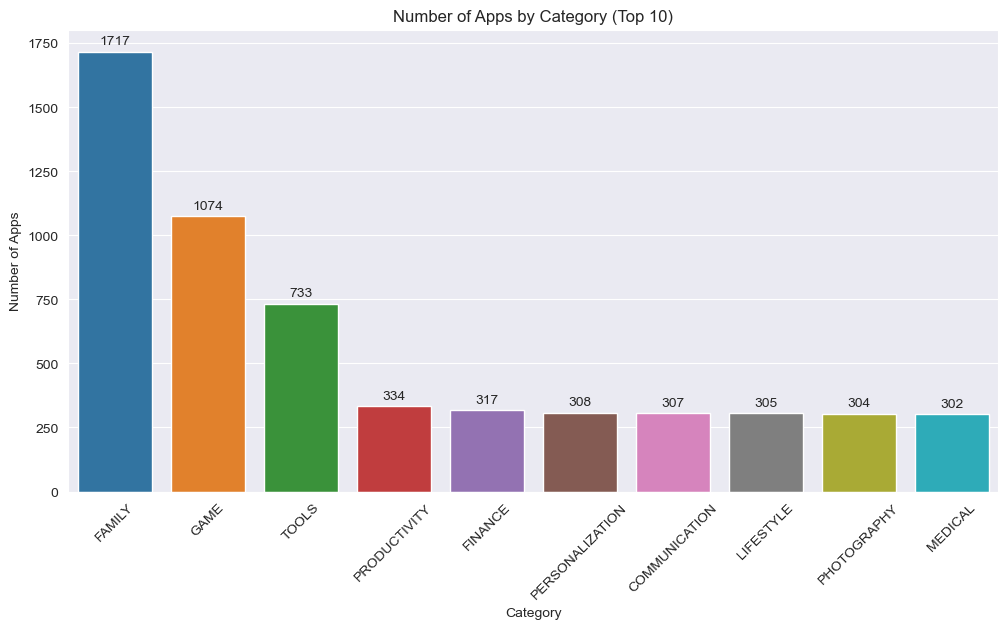

In [20]:
# What is the distribution of number of apps by category?
# Column Chart: Number of apps by Category (top 10)
plt.figure(figsize=(12, 6))
top_categories = df['Category'].value_counts().head(10).index
a = sns.countplot(x='Category', data=df, order=top_categories)
a.bar_label(a.containers[0], label_type='edge', padding=3, fontsize=10)
plt.title('Number of Apps by Category (Top 10)')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)  
plt.show()


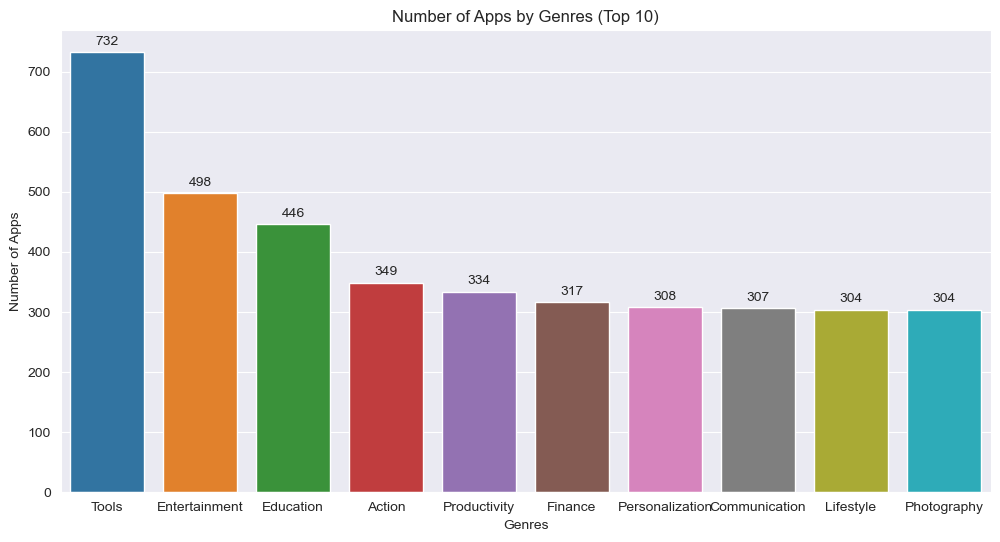

In [21]:
# What is the distribution of number of apps by Genres?
# Column Chart: Number of apps by Genres (top 10)
plt.figure(figsize=(12, 6))
top_Genres = df['Genres'].value_counts().head(10).index
a = sns.countplot(x='Genres', data=df, order=top_Genres)
a.bar_label(a.containers[0], label_type='edge', padding=3, fontsize=10)
plt.title('Number of Apps by Genres (Top 10)')
plt.xlabel('Genres')
plt.ylabel('Number of Apps')
plt.xticks(rotation=0)  
plt.show()

<Figure size 1200x600 with 0 Axes>

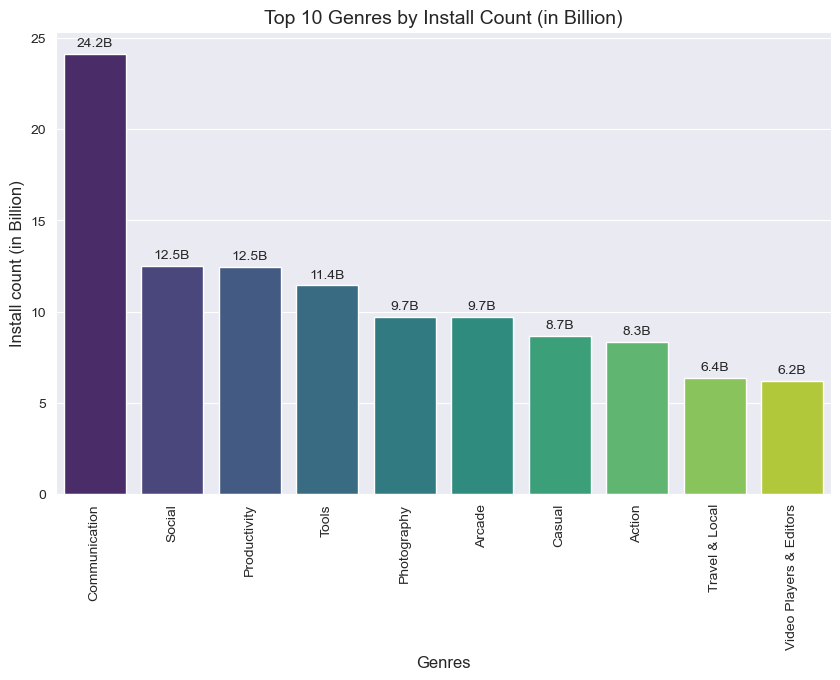

In [22]:
#Top Genres by Install Count

plt.figure(figsize=(12,6))
top_genres_installs = (df.groupby('Genres')['Installs'].sum().sort_values(ascending=False).head(10)/ 1000000000)


plt.figure(figsize=(10, 6))
a = sns.barplot(x=top_genres_installs.index, y=top_genres_installs.values, palette='viridis')
a.bar_label(a.containers[0], label_type='edge', padding=3, fontsize=10, fmt='%.1fB')


plt.title('Top 10 Genres by Install Count (in Billion)', fontsize=14)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Install count (in Billion)', fontsize=12)
plt.xticks(rotation=90)
plt.show()


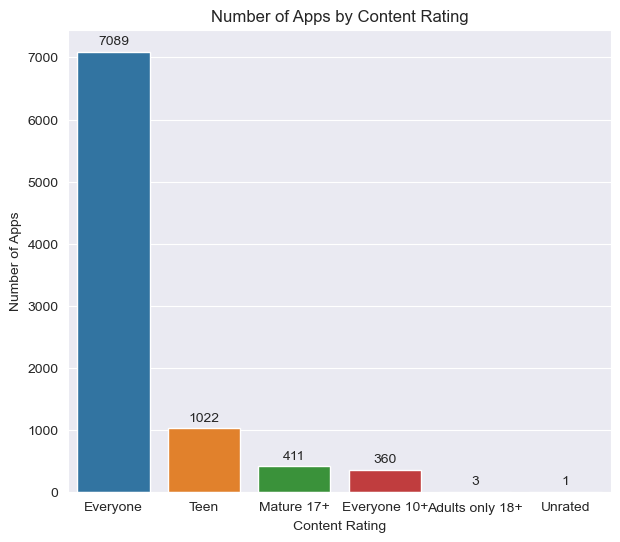

In [23]:
# What is the distribution of apps by Content Rating?
# Column Chart: Number of apps by Content Rating

plt.figure(figsize=(7, 6))
class_counts = df['Content Rating'].value_counts().index
a = sns.countplot(x='Content Rating', data=df, order=class_counts)
a.bar_label(a.containers[0], label_type='edge', padding=3, fontsize=10)
plt.title('Number of Apps by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')
plt.xticks(rotation=0)  

plt.show()

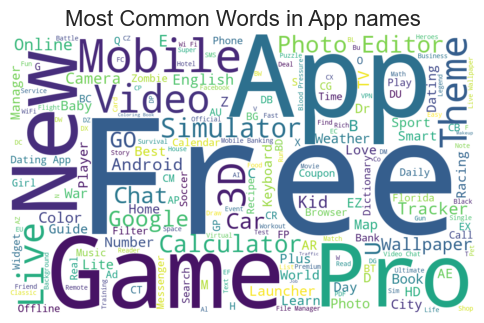

In [24]:
#Building a word cloud of the most common words in App names

# Combine all titles into one large string
text = ' '.join(df['App'].dropna())

# Create the word cloud
wordcloud = WordCloud(width=1000, height=600, background_color='white', colormap='viridis').generate(text)

# Plot it
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in App names', fontsize=16)
plt.show()

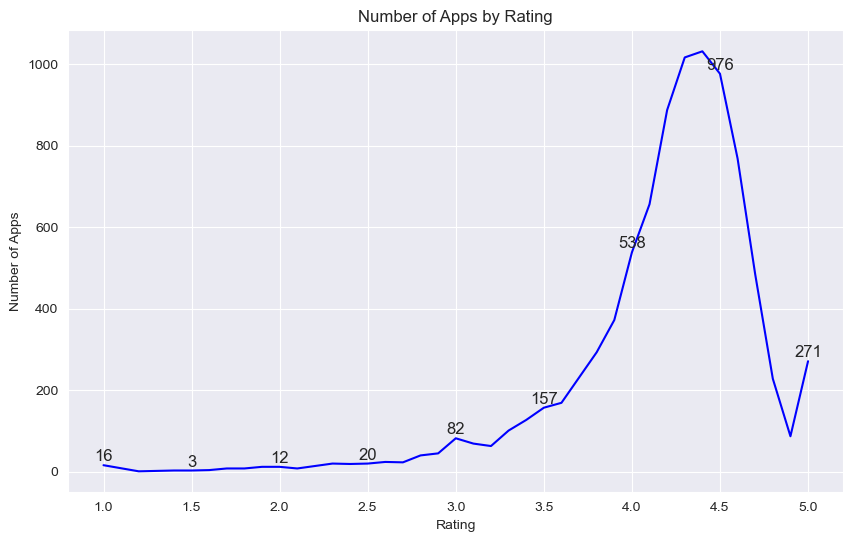

In [25]:
# line chart : number of apps by Ratings


rating_counts = df['Rating'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
plt.plot(rating_counts.index, rating_counts.values, linestyle='-', color='blue')


for x, y in zip(rating_counts.index, rating_counts.values):
    if x in [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]: 
        plt.text(x, y + 10, str(y), ha='center', fontsize=12)

plt.title('Number of Apps by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.grid(True)
plt.show()

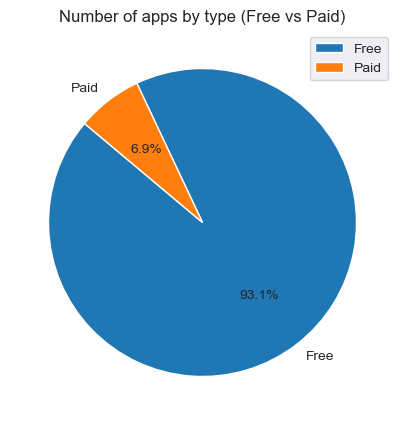

Type
Free    8275
Paid     611
Name: count, dtype: int64


In [26]:
#What is the numbers of Apps by type(Free vs Paid)?
# Pie Chart
class_counts = df['Type'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of apps by type (Free vs Paid)')
plt.legend(loc='best')
plt.show()

print(df['Type'].value_counts())

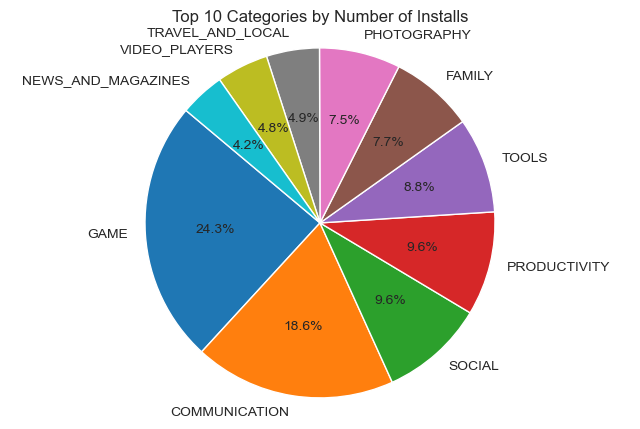

Top 10 number of installs (in billions) by Category of apps:

Category
GAME                  31.54
COMMUNICATION         24.15
SOCIAL                12.51
PRODUCTIVITY          12.46
TOOLS                 11.45
FAMILY                10.04
PHOTOGRAPHY            9.72
TRAVEL_AND_LOCAL       6.36
VIDEO_PLAYERS          6.22
NEWS_AND_MAGAZINES     5.39
Name: Installs, dtype: float64


In [27]:
#What is the top 10 number of installs by Category of apps?
# Pie Chart

top_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
plt.pie(top_installs, labels=top_installs.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Categories by Number of Installs')
plt.axis('equal')
plt.show()


print('Top 10 number of installs (in billions) by Category of apps:\n')
print(round(top_installs / 1_000_000_000, 2))


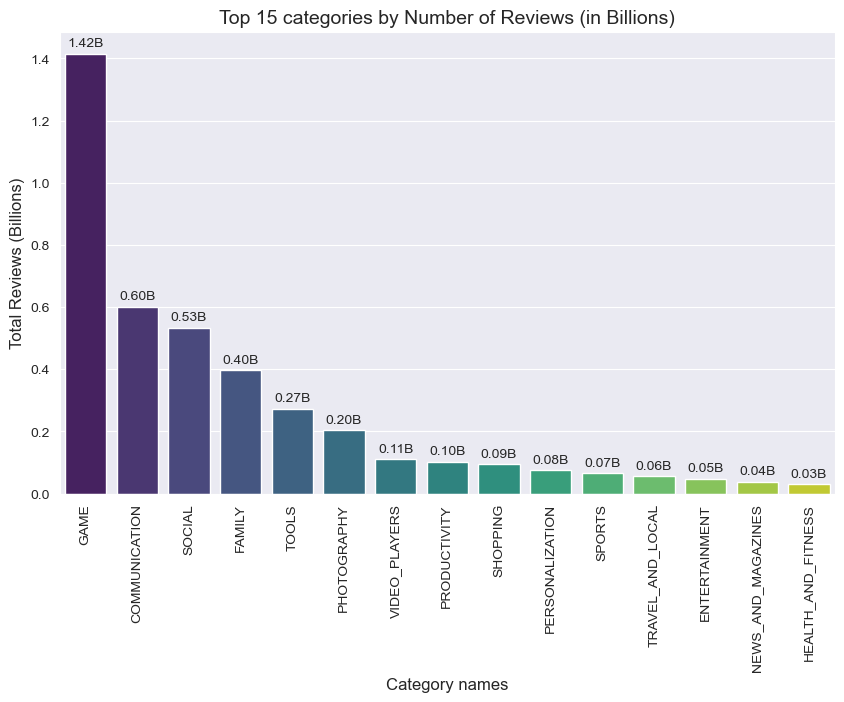

In [28]:
#Which category has most reviews?
#Column Chart: Count top 15 category app have most reviews

top_15_category = (df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(15) / 1000000000)


plt.figure(figsize=(10, 6))
a = sns.barplot(x=top_15_category.index, y=top_15_category.values, palette='viridis')
a.bar_label(a.containers[0], label_type='edge', padding=3, fontsize=10, fmt='%.2fB')

plt.title('Top 15 categories by Number of Reviews (in Billions)', fontsize=14)
plt.xlabel('Category names', fontsize=12)
plt.ylabel('Total Reviews (Billions)', fontsize=12)
plt.xticks(rotation=90)
plt.show()



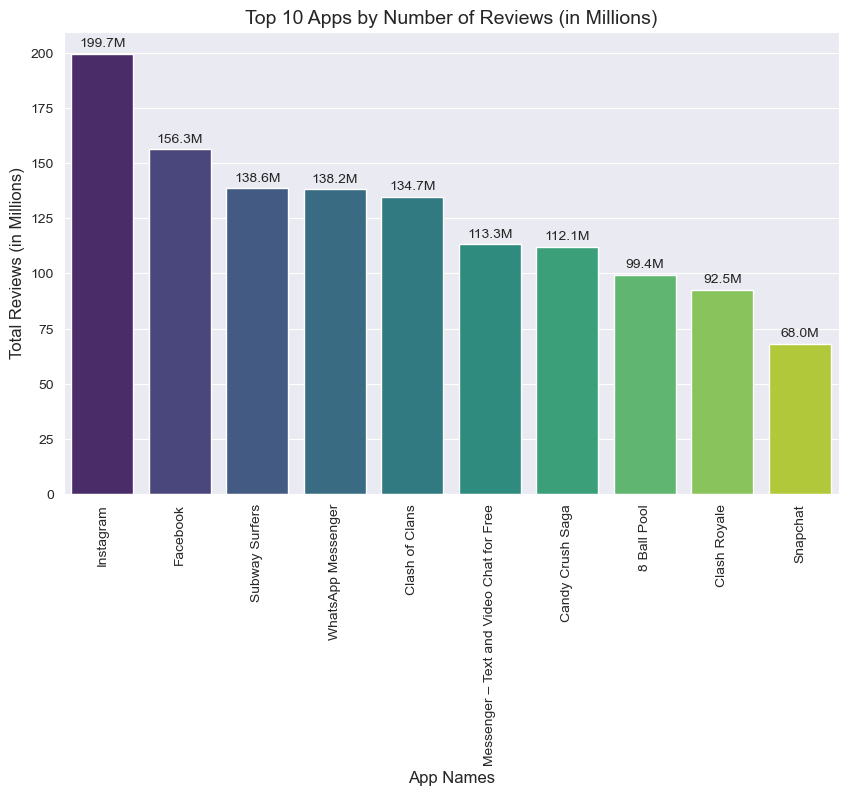

In [29]:
#Which app has the most reviews?
#Column Chart: Count top 10 apps have most reviews

top_10_app = (df.groupby('App')['Reviews'].sum().sort_values(ascending=False).head(10) / 1000000)


plt.figure(figsize=(10, 6))
a = sns.barplot(x=top_10_app.index, y=top_10_app.values, palette='viridis')
a.bar_label(a.containers[0], label_type='edge', padding=3, fontsize=10, fmt='%.1fM')

plt.title('Top 10 Apps by Number of Reviews (in Millions)', fontsize=14)
plt.xlabel('App Names', fontsize=12)
plt.ylabel('Total Reviews (in Millions)', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [39]:
# Top 20 apps by individual size
top_20_apps_by_size = df[['App', 'Size_MB']].sort_values(by='Size_MB', ascending=False).dropna().head(20)
print('Top 20 Apps by Size (in MB)')
print(top_20_apps_by_size)

Top 20 Apps by Size (in MB)
                                                     App  Size_MB
5427                                     Ultimate Tennis    100.0
1988                              Hungry Shark Evolution    100.0
1080                                           Post Bank    100.0
9170                       Stickman Legends: Shadow Wars    100.0
1565                      Talking Babsy Baby: Baby Games    100.0
8409    Car Crash III Beam DH Real Damage Simulator 2018    100.0
8847                          Draft Simulator for FUT 18    100.0
2299                                Navi Radiography Pro    100.0
3973                              Hungry Shark Evolution    100.0
1758                              Hungry Shark Evolution    100.0
4690                                          Vi Trainer    100.0
5865                        Gangster Town: Vice District    100.0
5530                         The Walking Dead: Our World    100.0
5862                               Miami crime s

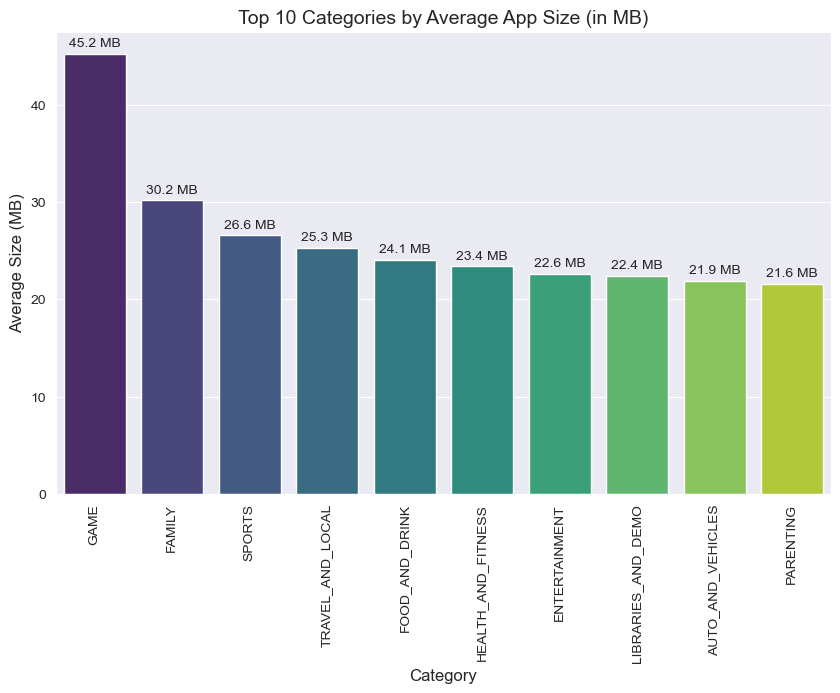

In [31]:
# Which categories have the largest average size?
# Column Chart: Top 10 categories by average app size

top_10_category_by_size = df.groupby('Category')['Size_MB'].mean().sort_values(ascending=False).head(10)


plt.figure(figsize=(10, 6))
a = sns.barplot(x=top_10_category_by_size.index, y=top_10_category_by_size.values, palette='viridis')
a.bar_label(a.containers[0], label_type='edge', padding=3, fontsize=10, fmt='%.1f MB')


plt.title('Top 10 Categories by Average App Size (in MB)', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Size (MB)', fontsize=12)
plt.xticks(rotation=90)
plt.show()


In [32]:
# Top 20 apps by individual cost
top_20_apps_by_cost = df[['App', 'Price']].sort_values(by='Price', ascending=False).dropna().head(20)
print('Top 20 Apps by Price (in $)')
print(top_20_apps_by_cost)


Top 20 Apps by Price (in $)
                                 App   Price
4367        I'm Rich - Trump Edition  400.00
5362                   I Am Rich Pro  399.99
5373              I AM RICH PRO PLUS  399.99
5356               I Am Rich Premium  399.99
5351                       I am rich  399.99
5358                      I am Rich!  399.99
5359              I am rich(premium)  399.99
4362                      💎 I'm rich  399.99
4197          most expensive app (H)  399.99
5364  I am rich (Most expensive app)  399.99
5369                       I am Rich  399.99
5354                  I am Rich Plus  399.99
5366                       I Am Rich  389.99
5357             I am extremely Rich  379.99
5355                   I am rich VIP  299.99
2253       Vargo Anesthesia Mega App   79.99
2414                    LTC AS Legal   39.99
5360                I am Rich Person   37.99
2301         A Manual of Acupuncture   33.99
2266                        EMT PASS   29.99


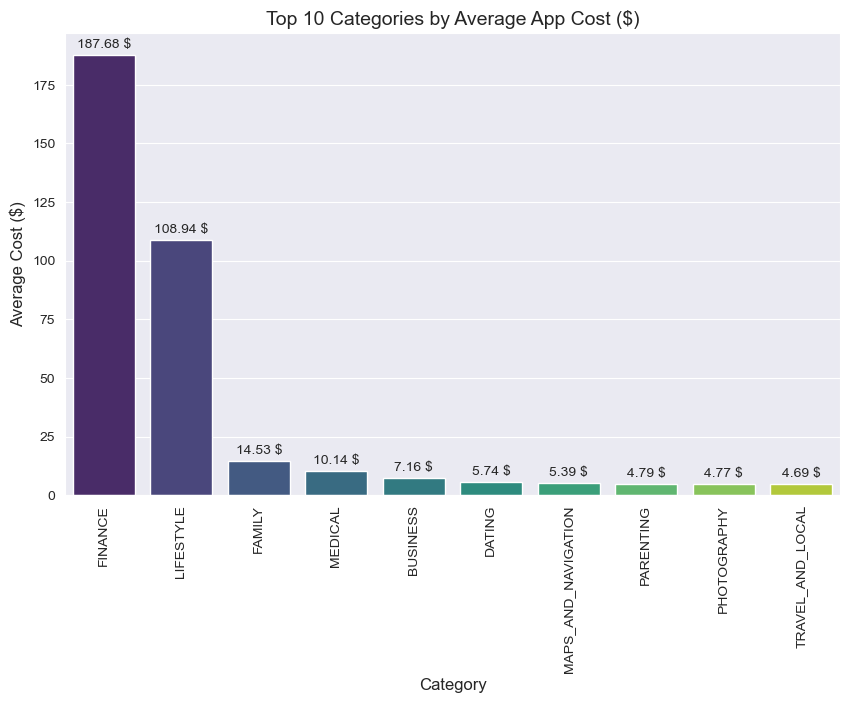

In [33]:
# Which categories have the largest average cost?
# Column Chart: Top 10 categories by average app cost

paid_apps = df[df['Price'] > 0]
top_10_category_by_cost = paid_apps.groupby('Category')['Price'].mean().sort_values(ascending=False).head(10)


plt.figure(figsize=(10, 6))
a = sns.barplot(x=top_10_category_by_cost.index, y=top_10_category_by_cost.values, palette='viridis')
a.bar_label(a.containers[0], label_type='edge', padding=3, fontsize=10, fmt='%.2f $')


plt.title('Top 10 Categories by Average App Cost ($)', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Cost ($)', fontsize=12)
plt.xticks(rotation=90)
plt.show()


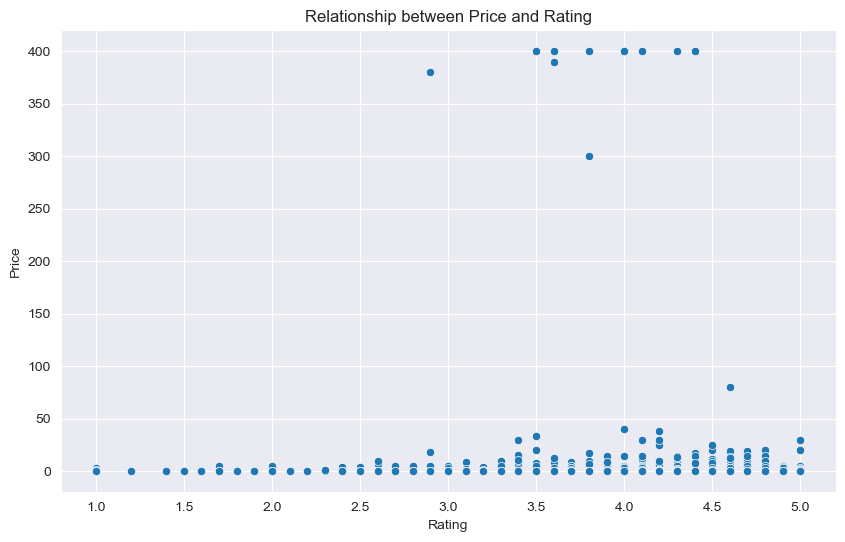

In [34]:
# Relationship Between Price and Rating

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Rating', y='Price')

plt.title('Relationship between Price and Rating')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()


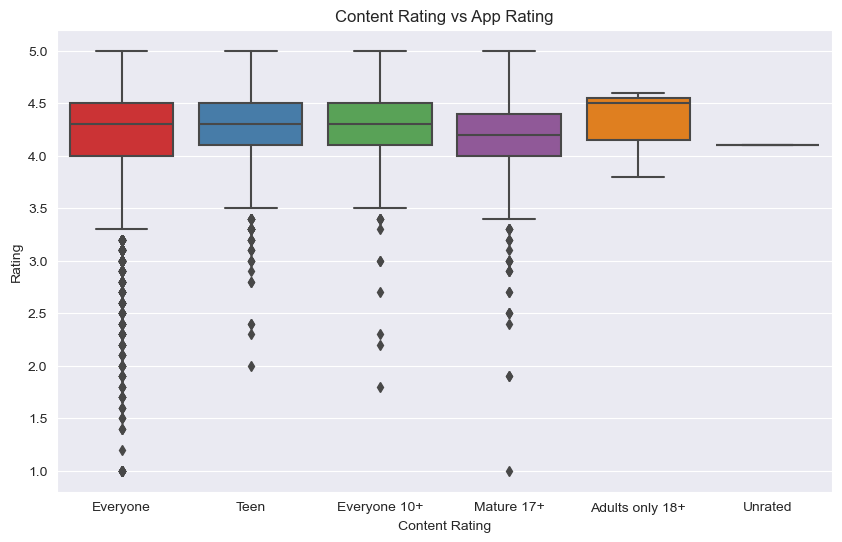

In [35]:
#Content Rating vs Rating

plt.figure(figsize=(10,6))
sns.boxplot(x='Content Rating', y='Rating', data=df, palette='Set1')
plt.title('Content Rating vs App Rating')
plt.show()

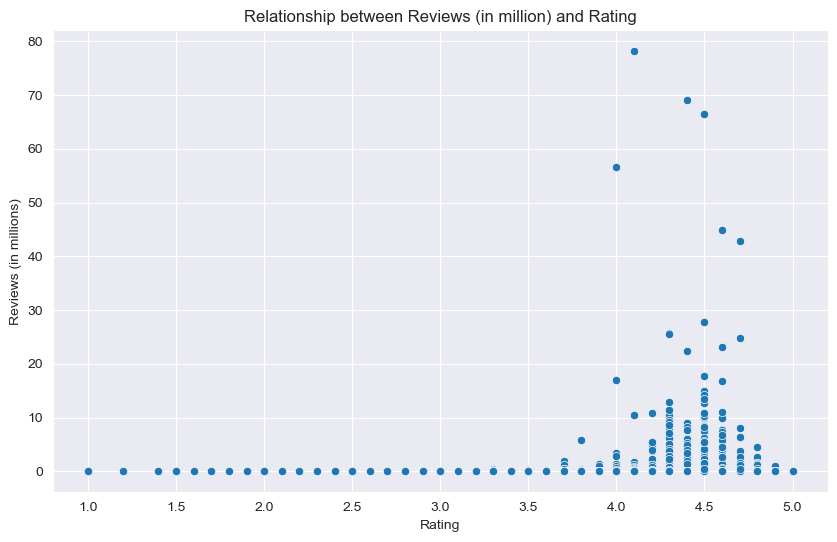

In [36]:
# Relation Between Reviews and Rating

df['Reviews_million'] = df['Reviews'] / 1000000

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Rating', y='Reviews_million')

plt.title('Relationship between Reviews (in million) and Rating')
plt.xlabel('Rating')
plt.ylabel('Reviews (in millions)')
plt.show()

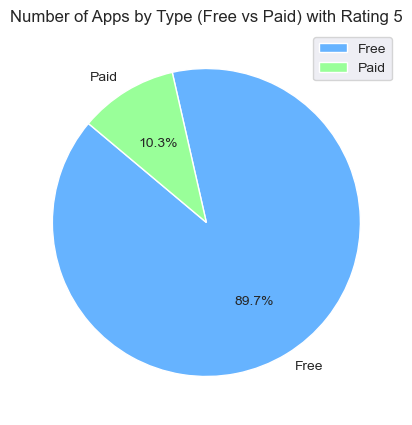

Number of Apps by Type (Free vs Paid) with Rating 5:
Type
Free    243
Paid     28
Name: count, dtype: int64


In [37]:
# Distribuytion of free and paid apps when rating is 5

import matplotlib.pyplot as plt

# Filter the DataFrame for apps with Rating equal to 5
rating_condition_df = df[df['Rating'] == 5]

# What is the number of Apps by type (Free vs Paid) for Rating = 5?
class_counts = rating_condition_df['Type'].value_counts()

# Pie Chart
plt.figure(figsize=(8, 5))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99'])
plt.title('Number of Apps by Type (Free vs Paid) with Rating 5')
plt.legend(loc='best')
plt.show()

# Print the counts of Free and Paid apps with Rating = 5
print("Number of Apps by Type (Free vs Paid) with Rating 5:")
print(class_counts)



In [38]:

# Machine Learning

# Predicting the app rating based on the features in the dataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Label Encoding categorical features
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Type'] = label_encoder.fit_transform(df['Type'])
df['Content Rating'] = label_encoder.fit_transform(df['Content Rating'])
df['Genres'] = label_encoder.fit_transform(df['Genres'])

# Define features and target variable
X = df[['Category', 'Reviews', 'Size_MB','Genres' ,'Installs','Price','Content Rating']]
y = df['Rating']

# Handle missing values
X.fillna(X.median(), inplace=True)
y.fillna(y.median(), inplace=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [173]:
#Random Forest Model (regression model)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
    
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE (Random forest):", rmse)
print('Mean Squared Error:',  mse)
print('R-squared:', r2)

RMSE (Random forest): 0.49255509319544216
Mean Squared Error: 0.2426105198327707
R-squared: 0.07297268526293088


In [174]:
#REGRESSION MODEL SVR MODEL

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Scale the features (important for SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Model training with SVR
model = SVR(kernel='rbf', C=100, epsilon=0.1)
model.fit(X_train_scaled, y_train_scaled)

# Prediction and inverse scaling
predictions_scaled = model.predict(X_test_scaled)
predictions = scaler_y.inverse_transform(predictions_scaled.reshape(-1, 1)).ravel()

# Metrics calculation
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("RMSE (SVR):", rmse)
print("MSE (SVR):", mse)
print("R² (SVR):", r2)

RMSE (SVR): 0.5075416113558233
MSE (SVR): 0.25759848725766565
R² (SVR): 0.015702888368532952


In [175]:
#REGRESSION MODEL SGD MODEL
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Scale the features (important for SGD)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Model training
model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_train_scaled, y_train_scaled)

# Prediction and inverse scaling
predictions_scaled = model.predict(X_test_scaled)
predictions = scaler_y.inverse_transform(predictions_scaled.reshape(-1, 1)).ravel()

# Metrics calculation
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("RMSE (SGD):", rmse)
print("MSE (SGD):", mse)
print("R² (SGD):", r2)


RMSE (SGD): 0.5095913273386774
MSE (SGD): 0.2596833208987951
R² (SGD): 0.007736631450482201


In [176]:
#REGRESSION MODEL DECISSION TREE

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize and train the model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE (Decision Tree):", rmse)
print("MSE (Decision Tree):", mse)
print("R² (Decision Tree):", r2)


RMSE (Decision Tree): 0.6843531780579963
MSE (Decision Tree): 0.4683392723180796
R² (Decision Tree): -0.789548525357463


In [177]:
#REGRESSION MODEL GRADIENT BOOSTING REGRESSOR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

# Initialize the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8],
    'min_samples_split': [2, 5]
}

# Perform GridSearchCV
grid_search_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_gbr.fit(X_train, y_train)

# Best parameters and model evaluation
best_gbr_model = grid_search_gbr.best_estimator_
y_pred_gbr = best_gbr_model.predict(X_test)

# Evaluation
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Best Parameters (GBR):", grid_search_gbr.best_params_)
print("RMSE (GBR):", rmse_gbr)
print("MSE (GBR):", mse_gbr)
print("R² (GBR):", r2_gbr)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters (GBR): {'learning_rate': 0.01, 'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.7}
RMSE (GBR): 0.4744016064632883
MSE (GBR): 0.22505688421494863
R² (GBR): 0.14004603270837213


In [178]:
#REGRESSION MODEL xGBoost
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

# Initialize the model
xgbr = xgb.XGBRegressor(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8]
}

# Perform GridSearchCV
grid_search_xgbr = GridSearchCV(estimator=xgbr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_xgbr.fit(X_train, y_train)

# Best parameters and model evaluation
best_xgbr_model = grid_search_xgbr.best_estimator_
y_pred_xgbr = best_xgbr_model.predict(X_test)

# Evaluation
rmse_xgbr = np.sqrt(mean_squared_error(y_test, y_pred_xgbr))
mse_xgbr = mean_squared_error(y_test, y_pred_xgbr)
r2_xgbr = r2_score(y_test, y_pred_xgbr)

print("Best Parameters (XGBoost):", grid_search_xgbr.best_params_)
print("RMSE (XGBoost):", rmse_xgbr)
print("MSE (XGBoost):", mse_xgbr)
print("R² (XGBoost):", r2_xgbr)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters (XGBoost): {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
RMSE (XGBoost): 0.47486472192963913
MSE (XGBoost): 0.22549650413331349
R² (XGBoost): 0.13836622231635953


In [180]:
# Classification model (Random Forest) 

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score, f1_score

# Convert the 'Rating' column into categorical classes (low, medium, high)
bins = [0, 2.5, 4.0, 5.0]
labels = ['low', 'medium', 'high']
df['RatingCategory'] = pd.cut(df['Rating'], bins=bins, labels=labels, right=False)

# Features and target variable
X = df[['Category', 'Reviews', 'Size_MB', 'Installs', 'Price', 'Genres', 'Content Rating']]
y = df['RatingCategory']

# Label Encoding for categorical features
label_encoder = LabelEncoder()
X['Category'] = label_encoder.fit_transform(X['Category'])
X['Content Rating'] = label_encoder.fit_transform(X['Content Rating'])
X['Genres'] = label_encoder.fit_transform(X['Genres'])

# Optional encoding for 'Type'
if 'Type' in X.columns:
    X['Type'] = label_encoder.fit_transform(X['Type'])

# Encode target
y = label_encoder.fit_transform(y)

# Optional: check class distribution
import numpy as np
unique, counts = np.unique(y, return_counts=True)
print("Class distribution:", dict(zip(unique, counts)))

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Random Forest with class_weight='balanced'
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_class = rf_clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_class) * 100))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_class))
print("F1 Score (Macro):", f1_score(y_test, y_pred_class, average='macro'))

print("Classification Report:")
print(classification_report(y_test, y_pred_class))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))



Class distribution: {0: 6671, 1: 128, 2: 1816, 3: 271}
Accuracy: 75.81%
Balanced Accuracy: 0.41467861754760194
F1 Score (Macro): 0.4167710860673553
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2002
           1       0.14      0.03      0.04        38
           2       0.49      0.21      0.29       545
           3       0.45      0.49      0.47        81

    accuracy                           0.76      2666
   macro avg       0.47      0.41      0.42      2666
weighted avg       0.71      0.76      0.72      2666

Confusion Matrix:
[[1868    0  106   28]
 [  20    1   10    7]
 [ 416    4  112   13]
 [  37    2    2   40]]


In [181]:
# Classification model (SGD) 

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score, f1_score
from sklearn.impute import SimpleImputer

# Convert the 'Rating' column into categorical classes (low, medium, high)
bins = [0, 2.5, 4.0, 5.0]
labels = ['low', 'medium', 'high']
df['RatingCategory'] = pd.cut(df['Rating'], bins=bins, labels=labels, right=False)

# Features and target variable
X = df[['Category', 'Reviews', 'Size_MB', 'Installs', 'Price', 'Genres', 'Content Rating']]
y = df['RatingCategory']

# Label Encoding for categorical features
label_encoder = LabelEncoder()
X['Category'] = label_encoder.fit_transform(X['Category'])
X['Content Rating'] = label_encoder.fit_transform(X['Content Rating'])
X['Genres'] = label_encoder.fit_transform(X['Genres'])

# Optional encoding for 'Type'
if 'Type' in X.columns:
    X['Type'] = label_encoder.fit_transform(X['Type'])

# Encode target
y = label_encoder.fit_transform(y)

# Optional: check class distribution
import numpy as np
unique, counts = np.unique(y, return_counts=True)
print("Class distribution:", dict(zip(unique, counts)))

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Or 'median', 'most_frequent'
X_imputed = imputer.fit_transform(X)  # Impute missing values in the features

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train the SGDClassifier model
sgd_clf = SGDClassifier(loss='log_loss', random_state=42)  # Correct loss function for logistic regression
sgd_clf.fit(X_train, y_train)

# Predictions
y_pred_class = sgd_clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_class))
print("F1 Score (Macro):", f1_score(y_test, y_pred_class, average='macro'))

print("Classification Report:")
print(classification_report(y_test, y_pred_class))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))


Class distribution: {0: 6671, 1: 128, 2: 1816, 3: 271}
Accuracy: 75.09%
Balanced Accuracy: 0.25
F1 Score (Macro): 0.21443873179091688
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      2002
           1       0.00      0.00      0.00        38
           2       0.00      0.00      0.00       545
           3       0.00      0.00      0.00        81

    accuracy                           0.75      2666
   macro avg       0.19      0.25      0.21      2666
weighted avg       0.56      0.75      0.64      2666

Confusion Matrix:
[[2002    0    0    0]
 [  38    0    0    0]
 [ 545    0    0    0]
 [  81    0    0    0]]


In [182]:
# Classification model (SVC)

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score, f1_score
from sklearn.impute import SimpleImputer

# Convert the 'Rating' column into categorical classes (low, medium, high)
bins = [0, 2.5, 4.0, 5.0]
labels = ['low', 'medium', 'high']
df['RatingCategory'] = pd.cut(df['Rating'], bins=bins, labels=labels, right=False)

# Features and target variable
X = df[['Category', 'Reviews', 'Size_MB', 'Installs', 'Price', 'Genres', 'Content Rating']]
y = df['RatingCategory']

# Label Encoding for categorical features
label_encoder = LabelEncoder()
X['Category'] = label_encoder.fit_transform(X['Category'])
X['Content Rating'] = label_encoder.fit_transform(X['Content Rating'])
X['Genres'] = label_encoder.fit_transform(X['Genres'])

# Optional encoding for 'Type'
if 'Type' in X.columns:
    X['Type'] = label_encoder.fit_transform(X['Type'])

# Encode target
y = label_encoder.fit_transform(y)

# Optional: check class distribution
import numpy as np
unique, counts = np.unique(y, return_counts=True)
print("Class distribution:", dict(zip(unique, counts)))

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
X_imputed = imputer.fit_transform(X)  # Impute missing values

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train the SVC model
svc_clf = SVC(kernel='rbf', random_state=42)  # You can also try 'linear' or 'poly' kernels
svc_clf.fit(X_train, y_train)

# Predictions
y_pred_class = svc_clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_class))
print("F1 Score (Macro):", f1_score(y_test, y_pred_class, average='macro'))

print("Classification Report:")
print(classification_report(y_test, y_pred_class))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))


Class distribution: {0: 6671, 1: 128, 2: 1816, 3: 271}
Accuracy: 75.09%
Balanced Accuracy: 0.25
F1 Score (Macro): 0.21443873179091688
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      2002
           1       0.00      0.00      0.00        38
           2       0.00      0.00      0.00       545
           3       0.00      0.00      0.00        81

    accuracy                           0.75      2666
   macro avg       0.19      0.25      0.21      2666
weighted avg       0.56      0.75      0.64      2666

Confusion Matrix:
[[2002    0    0    0]
 [  38    0    0    0]
 [ 545    0    0    0]
 [  81    0    0    0]]


In [183]:
# Classification model (Gradient Boosting) 

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score, f1_score
from sklearn.impute import SimpleImputer

# Convert the 'Rating' column into categorical classes (low, medium, high)
bins = [0, 2.5, 4.0, 5.0]
labels = ['low', 'medium', 'high']
df['RatingCategory'] = pd.cut(df['Rating'], bins=bins, labels=labels, right=False)

# Features and target variable
X = df[['Category', 'Reviews', 'Size_MB', 'Installs', 'Price', 'Genres', 'Content Rating']]

# Handle missing values by imputing with the median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Target variable
y = df['RatingCategory']

# Label Encoding for categorical features
label_encoder = LabelEncoder()
X_imputed[:, 0] = label_encoder.fit_transform(X_imputed[:, 0])  # Category
X_imputed[:, 5] = label_encoder.fit_transform(X_imputed[:, 5])  # Genres
X_imputed[:, 6] = label_encoder.fit_transform(X_imputed[:, 6])  # Content Rating

# Encode target
y = label_encoder.fit_transform(y)

# Optional: check class distribution
import numpy as np
unique, counts = np.unique(y, return_counts=True)
print("Class distribution:", dict(zip(unique, counts)))

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

# Predictions
y_pred_class = gb_clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_class))
print("F1 Score (Macro):", f1_score(y_test, y_pred_class, average='macro'))

print("Classification Report:")
print(classification_report(y_test, y_pred_class))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))


Class distribution: {0: 6671, 1: 128, 2: 1816, 3: 271}
Accuracy: 75.69%
Balanced Accuracy: 0.4252243720536011
F1 Score (Macro): 0.4078259917172872
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86      2002
           1       0.14      0.03      0.04        38
           2       0.44      0.10      0.17       545
           3       0.51      0.62      0.56        81

    accuracy                           0.76      2666
   macro avg       0.47      0.43      0.41      2666
weighted avg       0.70      0.76      0.70      2666

Confusion Matrix:
[[1911    3   60   28]
 [  21    1   10    6]
 [ 472    3   56   14]
 [  29    0    2   50]]


In [184]:
# Classification model (XGBoost) 

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score, f1_score

# Convert the 'Rating' column into categorical classes (low, medium, high)
bins = [0, 2.5, 4.0, 5.0]
labels = ['low', 'medium', 'high']
df['RatingCategory'] = pd.cut(df['Rating'], bins=bins, labels=labels, right=False)

# Features and target variable
X = df[['Category', 'Reviews', 'Size_MB', 'Installs', 'Price', 'Genres', 'Content Rating']]
y = df['RatingCategory']

# Label Encoding for categorical features
label_encoder = LabelEncoder()
X['Category'] = label_encoder.fit_transform(X['Category'])
X['Content Rating'] = label_encoder.fit_transform(X['Content Rating'])
X['Genres'] = label_encoder.fit_transform(X['Genres'])

# Optional encoding for 'Type'
if 'Type' in X.columns:
    X['Type'] = label_encoder.fit_transform(X['Type'])

# Encode target
y = label_encoder.fit_transform(y)

# Optional: check class distribution
import numpy as np
unique, counts = np.unique(y, return_counts=True)
print("Class distribution:", dict(zip(unique, counts)))

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train the XGBoost Classifier
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)

# Predictions
y_pred_class = xgb_clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_class))
print("F1 Score (Macro):", f1_score(y_test, y_pred_class, average='macro'))

print("Classification Report:")
print(classification_report(y_test, y_pred_class))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))


Class distribution: {0: 6671, 1: 128, 2: 1816, 3: 271}
Accuracy: 75.02%
Balanced Accuracy: 0.4110977381257439
F1 Score (Macro): 0.4120761684958484
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2002
           1       0.17      0.03      0.05        38
           2       0.45      0.22      0.29       545
           3       0.43      0.48      0.46        81

    accuracy                           0.75      2666
   macro avg       0.46      0.41      0.41      2666
weighted avg       0.71      0.75      0.72      2666

Confusion Matrix:
[[1842    2  127   31]
 [  19    1   13    5]
 [ 411    1  118   15]
 [  33    2    7   39]]
